## Import general packages

In [1]:
import pandas as pd
import os
import sys
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import itertools


## Define locations

In [2]:
# Change this to the path of your repo.
loc_main = 'C:\\Users\\johanr\\OneDrive - Ortec B.V\\Data Analysis for Strengths and Weaknesses\\Sustainable_code_structure'

# Define paths inside of our repo
loc_input_data = os.path.join(loc_main, 'data', 'input')
loc_intermediate_data = os.path.join(loc_main, 'data', 'intermediate')
loc_output_data = os.path.join(loc_main, 'data', 'output')
loc_utils = os.path.join(loc_main, 'code')

## Import own functionalities

In [3]:
sys.path.insert(1, loc_utils)
from data_utils import plot_corr_map, scatter_plot_simulation_check,plot12_hist_classification

## Import required data

In [4]:
file = pd.read_csv(loc_output_data+"\\16-05-23_Final_1020.csv")

## Figure 5.34 Distribution of Complete and Incomplete Solutions

In [5]:
file=file.rename(columns={'Final Time':'final_time', 'Final Cost':'final_cost','Vehicle Availability':'Vehicle Availability Location'})
file = file.rename(columns={'pct_planned':'planned_pct'})
file['Complete'] = (file['planned_pct']==1)

In [6]:
file=file.rename(columns={'Mean Dist Matrix':'Mean_Dist_Matrix', 'Std Dist Matrix':'Std_Dist_Matrix',
       'Mean Distance Depot Centroid':'Mean_Distance_Depot_Centroid', 'Number of clusters':'Number_of_clusters',
       'Customer Time Window Mean':'Customer_Time_Window_Mean', 'Customer Time Window Std':'Customer_Time_Window_Std',
       'Number of customers':'Number_of_customers', 'Number of vehicles':'Number_of_vehicles',
       'Vehicles Time Window Mean':'Vehicles_Time_Window_Mean', 'Vehicles Time Window Std':'Vehicles_Time_Window_Std',
       'Ortecs Customer':'Ortecs_Customer', 'Customer Demand Location':'Customer_Demand_Location',
       'Vehicle Availability Location':'Vehicle_Availability_Location', 'Final Cost':'Final_Cost',
       'Number of planned tasks':'Number_of_planned_tasks', 'Cost Array':'Cost_Array', 
       'Time Array':'Time_Array', 'CV Dist Matrix':'CV_Dist_Matrix', 'Number of planned tasks Array':'Task_Array', 'Final Time':'Final_Time'})

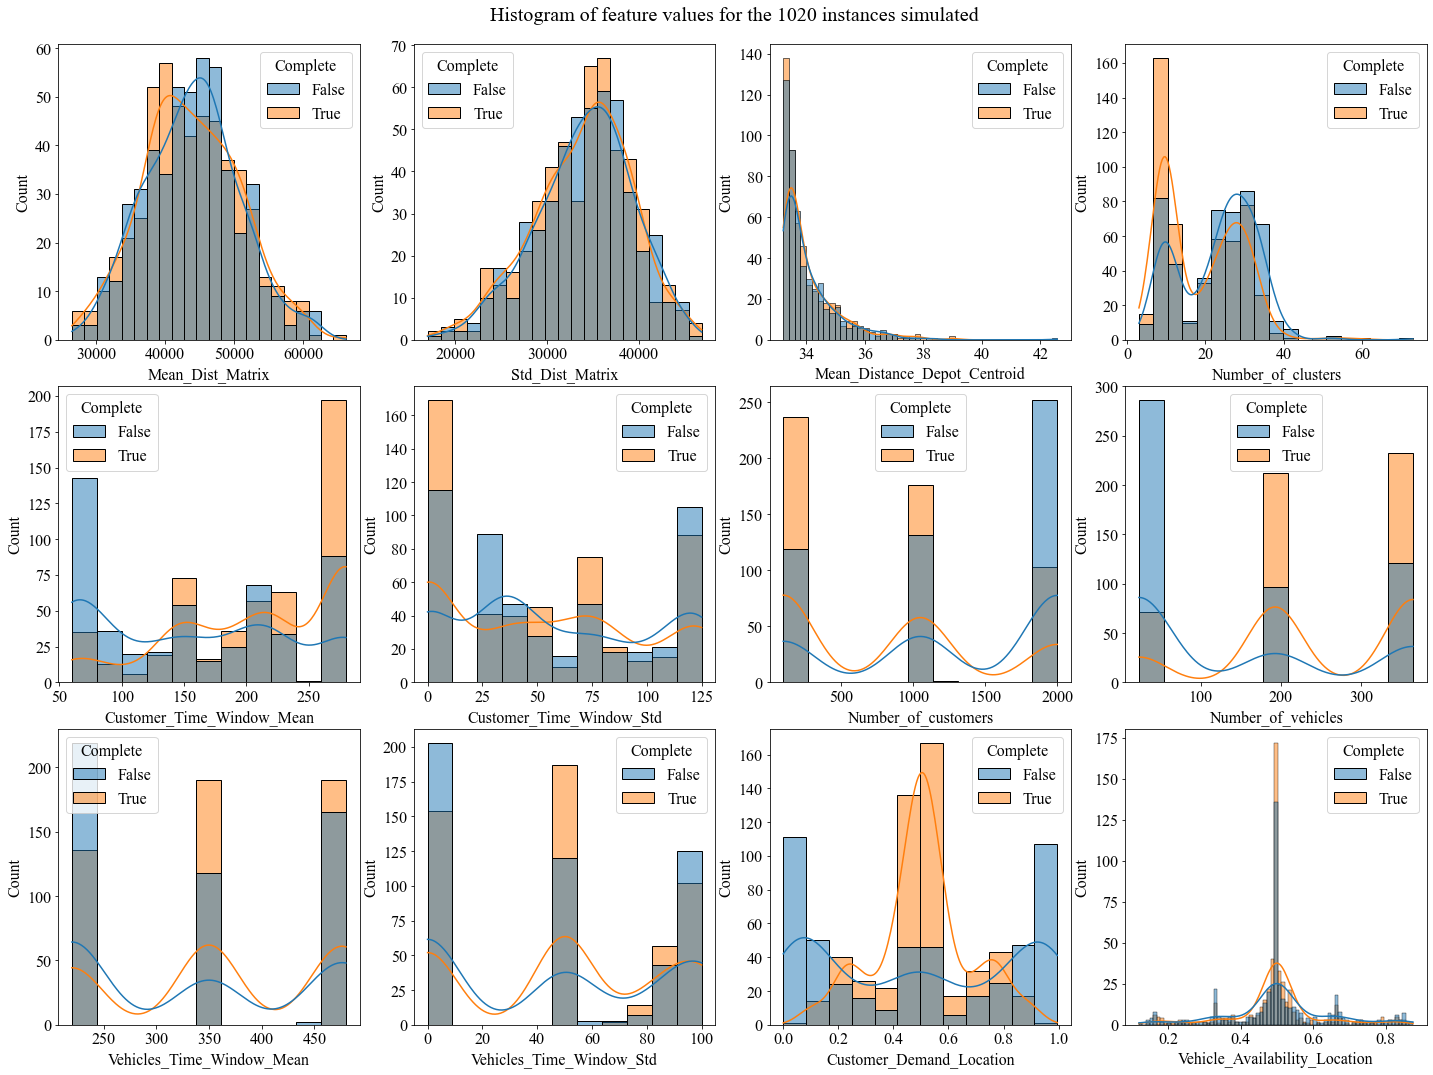

In [7]:
plot12_hist_classification(file)

# Table 5.8 : KS test output

In [11]:
for colname in ['Mean_Dist_Matrix', 'Std_Dist_Matrix',
       'Mean_Distance_Depot_Centroid', 'Number_of_clusters',
       'Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
       'Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Customer_Demand_Location',
       'Vehicle_Availability_Location']:
       print(colname)
       print(ks_2samp(file[file['Complete']==True][colname], file[file['Complete']==False][colname]))

Mean_Dist_Matrix
KstestResult(statistic=0.056386120339608714, pvalue=0.37306133575270406)
Std_Dist_Matrix
KstestResult(statistic=0.037006275378368404, pvalue=0.8578049839405433)
Mean_Distance_Depot_Centroid
KstestResult(statistic=0.04355850867478774, pvalue=0.6952185850312853)
Number_of_clusters
KstestResult(statistic=0.2172388335179033, pvalue=4.888389693036288e-11)
Customer_Time_Window_Mean
KstestResult(statistic=0.3091546696197859, pvalue=3.8450578804831634e-22)
Customer_Time_Window_Std
KstestResult(statistic=0.12255444813584349, pvalue=0.0008330666068292469)
Number_of_customers
KstestResult(statistic=0.3023717238833518, pvalue=3.517120038526562e-21)
Number_of_vehicles
KstestResult(statistic=0.4298634182355113, pvalue=2.571918680238e-43)
Vehicles_Time_Window_Mean
KstestResult(statistic=0.18733850129198967, pvalue=2.601738835483758e-08)
Vehicles_Time_Window_Std
KstestResult(statistic=0.12153931339977851, pvalue=0.0009466335844157125)
Customer_Demand_Location
KstestResult(statistic=0.

# Modelling - Main effects

In [13]:
file['class']=file['Complete'].apply(lambda x: 1 if x==True else 0)
interest_columns=[
       'Customer_Time_Window_Mean', 'Customer_Time_Window_Std','Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std','Customer_Demand_Location',
       'Vehicle_Availability_Location', 'Number_of_clusters', 
       "class"]
x_train, x_test, y_train, y_test=train_test_split(file[interest_columns].drop(columns=['class']),file['class'],test_size=0.3, stratify=file['class'], random_state=123)

In [14]:
sc=StandardScaler()
data=sc.fit_transform(x_train)
x_train=pd.DataFrame(data, columns=interest_columns[:-1])

data=sc.transform(x_test)
x_test=pd.DataFrame(data, columns=interest_columns[:-1])

## Logistic regression

### Gridsearch

In [19]:
grid={"C":np.logspace(-3,3,10), "penalty":["l1","l2"], "solver":["saga"], "max_iter":[500]}
logreg=LogisticRegression(random_state=123)
logreg_cv=GridSearchCV(logreg,grid,cv=KFold(10, random_state=123, shuffle=True))
logreg_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.78302034428795


### Best model

In [20]:
logreg2=LogisticRegression(C=0.1,penalty="l1", solver='saga', max_iter=500, random_state=123)
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_train,y_train))
print("score",logreg2.score(x_test,y_test))

score 0.7899159663865546
score 0.7745098039215687


In [22]:
logreg2.coef_

array([[ 1.09208644, -0.39177546, -0.85753367,  1.06942946,  0.17842357,
         0.08429462,  0.01172908,  0.        ,  0.        ]])

## LDA

In [23]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
print("score",lda.score(x_train,y_train))
print("score",lda.score(x_test,y_test))

score 0.7927170868347339
score 0.7810457516339869


## QDA

In [24]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
print("score",qda.score(x_train,y_train))
print("score",qda.score(x_test,y_test))

score 0.8977591036414566
score 0.8725490196078431


## KNN classifier

### Gridsearch

In [25]:
grid={"n_neighbors":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50], "weights":['uniform', 'distance']}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=KFold(10, random_state=123, shuffle=True))
knn_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 10, 'weights': 'distance'}
accuracy : 0.897887323943662


### Best model

In [26]:
knn=KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(x_train,y_train)
print("score",knn.score(x_train,y_train))
print("score",knn.score(x_test,y_test))

score 1.0
score 0.8954248366013072


## SVC polynomial kernel

### Gridsearch

In [27]:
grid={"C":np.logspace(-3,3,10), "kernel":['poly'], "degree":[1, 2, 3]}
svc=SVC(random_state=123)
svc_cv=GridSearchCV(svc,grid,cv=KFold(10, random_state=123, shuffle=True), verbose=2)
svc_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("accuracy :",svc_cv.best_score_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=2, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=

### Best Model

In [28]:
svc=SVC(C=10, degree=3, kernel='poly', random_state=123)
svc.fit(x_train,y_train)
print("score",svc.score(x_train, y_train))
print("score",svc.score(x_test,y_test))

score 0.9593837535014006
score 0.8986928104575164


## SVC RBF kernel

### Gridsearch

In [29]:
grid={"C":np.logspace(-3,3,10), "kernel":['rbf'], 'gamma':['auto', 'scale', 0.001, 0.01, 0.1, 1, 10, 100]}
svc=SVC(random_state=123)
svc_cv=GridSearchCV(svc,grid,cv=KFold(10, random_state=123, shuffle=True), verbose=2)
svc_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("accuracy :",svc_cv.best_score_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=sca

### Best model

In [30]:
svc=SVC(C=215.44346900318823, gamma=0.01, kernel='rbf', random_state=123)
svc.fit(x_train,y_train)
print("score",svc.score(x_train,y_train))
print("score",svc.score(x_test,y_test))

score 0.9649859943977591
score 0.9477124183006536


## Random Forest Classifier

### Gridsearch

In [31]:
rf=RandomForestClassifier(random_state=123)
params={'n_estimators': [200],
    'max_depth' : [20, 16, 12, 8, 4], 
    'max_features':['sqrt', 'log2', None]}
gs=GridSearchCV(rf, params, verbose=2, cv=KFold(10, random_state=123, shuffle=True))
gs.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("accuracy :",gs.best_score_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=log2, n_

### Second gridsearch

In [32]:
rf=RandomForestClassifier(random_state=123)
params={'n_estimators': [200],
    'max_depth' : [8], 
    'max_features':[1, 2, 3, 4, 5, 6, 7, 8, 9]}
gs=GridSearchCV(rf, params, verbose=2, cv=KFold(10, random_state=123, shuffle=True))
gs.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("accuracy :",gs.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ......max_depth=8, max_features=1, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=8, max_features=1, n_estimators=200; total time=   0.1s
[CV] END ......max_depth=8, max_features=1, n_estimators=200; total time=   0.2s
[CV] END ......max_depth=8, max_features=1, n_estimators=200; total time=   0.4s
[CV] END ......max_depth=8, max_features=1, n_estimators=200; total time=   0.3s
[CV] END ......max_depth=8, max_features=1, n_estimators=200; total time=   0.5s
[CV] END ......max_depth=8, max_features=1, n_estimators=200; total time=   0.4s
[CV] END ......max_depth=8, max_features=1, n_estimators=200; total time=   0.4s
[CV] END ......max_depth=8, max_features=1, n_estimators=200; total time=   0.7s
[CV] END ......max_depth=8, max_features=1, n_estimators=200; total time=   1.0s
[CV] END ......max_depth=8, max_features=2, n_estimators=200; total time=   0.5s
[CV] END ......max_depth=8, max_features=2, n_es

### Best model

In [33]:
rf=RandomForestClassifier(max_depth=8, max_features=5,  n_estimators=200, random_state=123)
rf.fit(x_train, y_train)
print("score",rf.score(x_train,y_train))
print("score",rf.score(x_test,y_test))

score 0.9957983193277311
score 0.8986928104575164


# Model with main effects + interactions

In [34]:
x_train, x_test, y_train, y_test=train_test_split(file[interest_columns].drop(columns=['class']),file['class'],test_size=0.3, stratify=file['class'], random_state=123)

In [35]:
sc=StandardScaler()
data=sc.fit_transform(x_train)
x_train=pd.DataFrame(data, columns=interest_columns[:-1])

data=sc.transform(x_test)
x_test=pd.DataFrame(data, columns=interest_columns[:-1])

In [38]:
for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
       'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Number_of_clusters'], 2):
    x_train[x[0]+"X"+x[1]] = x_train[x[0]]*x_train[x[1]]

for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
       'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Number_of_clusters'], 2):
    x_test[x[0]+"X"+x[1]] = x_test[x[0]]*x_test[x[1]]

## Logistic Regression

In [39]:
grid={"C":np.logspace(-3,3,10), "penalty":["l1","l2"], "solver":["saga"], "max_iter":[500]}
logreg=LogisticRegression(random_state=123)
logreg_cv=GridSearchCV(logreg,grid,cv=KFold(10, random_state=123, shuffle=True))
logreg_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 2.154434690031882, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.8083137715179969


In [40]:
logreg2=LogisticRegression(C=2.154434690031882,penalty="l1", solver='saga', max_iter=500, random_state=123)
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_train,y_train))
print("score",logreg2.score(x_test,y_test))

score 0.8445378151260504
score 0.8235294117647058


In [41]:
logreg2.coef_

array([[ 2.41435461, -1.55208101, -1.82185312,  2.61815206,  0.8035682 ,
         0.46287903,  0.25562047,  0.20210749, -0.43339779,  0.22242761,
         0.20661948, -0.01618319, -0.15731458, -0.05153685,  0.08198194,
         0.08437054,  0.09647829, -0.30986104,  0.20809649,  0.15108771,
        -0.01615877,  0.40238305, -0.10581552, -0.11084396, -0.1764048 ,
        -1.04937065,  2.0176084 ,  0.72873255,  0.36419431, -0.40011301,
         0.88789615, -1.6033607 , -0.6046728 , -0.15578854,  0.24541203,
        -0.33755377, -0.04311542, -0.1164879 , -0.45140603,  0.06520935,
         0.10663657,  0.36223983, -0.01656079,  0.03948977,  0.01189894]])

## LDA

In [42]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
print("score",lda.score(x_train,y_train))
print("score",lda.score(x_test,y_test))

score 0.8249299719887955
score 0.7973856209150327


## QDA

In [43]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
print("score",qda.score(x_train,y_train))
print("score",qda.score(x_test,y_test))

score 0.9397759103641457
score 0.8725490196078431


## KN classifier

In [44]:
grid={"n_neighbors":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50], "weights":['uniform', 'distance']}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=KFold(10, random_state=123, shuffle=True))
knn_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 3, 'weights': 'distance'}
accuracy : 0.8544014084507042


In [45]:
knn=KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(x_train,y_train)
print("score",knn.score(x_train,y_train))
print("score",knn.score(x_test,y_test))

score 1.0
score 0.8562091503267973


## SVC Poly kernel

In [46]:
grid={"C":np.logspace(-3,3,10), "kernel":['poly'], "degree":[1, 2, 3]}
svc=SVC(random_state=123)
svc_cv=GridSearchCV(svc,grid,cv=KFold(10, random_state=123, shuffle=True), verbose=2)
svc_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("accuracy :",svc_cv.best_score_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=2, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=

In [47]:
svc=SVC(C=10, degree=2, kernel='poly', random_state=123)
svc.fit(x_train,y_train)
print("score",svc.score(x_train,y_train))
print("score",svc.score(x_test,y_test))

score 0.9831932773109243
score 0.9084967320261438


## SVC rbf kernel

In [48]:
grid={"C":np.logspace(-3,3,10), "kernel":['rbf'], 'gamma':['auto', 'scale', 0.001, 0.01, 0.1, 1, 10, 100]}
svc=SVC(random_state=123)
svc_cv=GridSearchCV(svc,grid,cv=KFold(10, random_state=123, shuffle=True), verbose=2)
svc_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("accuracy :",svc_cv.best_score_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=sca

In [49]:
svc=SVC(C=46.41588833612773, gamma=0.01, kernel='rbf', random_state=123)
svc.fit(x_train,y_train)
print("score",svc.score(x_train,y_train))
print("score",svc.score(x_test,y_test))

score 0.9929971988795518
score 0.8986928104575164


## Random Forest Classifer

In [50]:
rf=RandomForestClassifier(random_state=123)
params={'n_estimators': [200],
    'max_depth' : [20, 16, 12, 8, 4], 
    'max_features':['sqrt', 'log2', None]}
gs=GridSearchCV(rf, params, verbose=2, cv=KFold(10, random_state=123, shuffle=True))
gs.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("accuracy :",gs.best_score_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=log2, n_

In [51]:
rf=RandomForestClassifier(random_state=123)
params={'n_estimators': [200],
    'max_depth' : [12], 
    'max_features':[45, 30, 20, 15, 10, 5, 3, 2, 1]}
gs=GridSearchCV(rf, params, verbose=2, cv=KFold(10, random_state=123, shuffle=True))
gs.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("accuracy :",gs.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ....max_depth=12, max_features=45, n_estimators=200; total time=   1.8s
[CV] END ....max_depth=12, max_features=45, n_estimators=200; total time=   1.4s
[CV] END ....max_depth=12, max_features=45, n_estimators=200; total time=   1.7s
[CV] END ....max_depth=12, max_features=45, n_estimators=200; total time=   1.6s
[CV] END ....max_depth=12, max_features=45, n_estimators=200; total time=   2.0s
[CV] END ....max_depth=12, max_features=45, n_estimators=200; total time=   1.9s
[CV] END ....max_depth=12, max_features=45, n_estimators=200; total time=   1.8s
[CV] END ....max_depth=12, max_features=45, n_estimators=200; total time=   1.9s
[CV] END ....max_depth=12, max_features=45, n_estimators=200; total time=   2.4s
[CV] END ....max_depth=12, max_features=45, n_estimators=200; total time=   1.8s
[CV] END ....max_depth=12, max_features=30, n_estimators=200; total time=   1.1s
[CV] END ....max_depth=12, max_features=30, n_es

In [52]:
rf=RandomForestClassifier(max_depth=20, max_features=3, n_estimators=200, random_state=123)
rf.fit(x_train, y_train)
print("score",rf.score(x_train,y_train))
print("score",rf.score(x_test,y_test))

score 1.0
score 0.9117647058823529


# Model with main effects, interaction and quadratic effects

In [53]:
x_train, x_test, y_train, y_test=train_test_split(file[interest_columns].drop(columns=['class']),file['class'],test_size=0.3, stratify=file['class'], random_state=123)

In [54]:
sc=StandardScaler()
data=sc.fit_transform(x_train)
x_train=pd.DataFrame(data, columns=interest_columns[:-1])

data=sc.transform(x_test)
x_test=pd.DataFrame(data, columns=interest_columns[:-1])

In [55]:
for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
       'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Number_of_clusters'], 2):
    x_train[x[0]+"X"+x[1]] = x_train[x[0]]*x_train[x[1]]

for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
       'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Number_of_clusters'], 1):
    x_train[x[0]+"X"+x[0]] = x_train[x[0]]*x_train[x[0]]

for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
       'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Number_of_clusters'], 2):
    x_test[x[0]+"X"+x[1]] = x_test[x[0]]*x_test[x[1]]

for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
       'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Number_of_clusters'], 1):
    x_test[x[0]+"X"+x[0]] = x_test[x[0]]*x_test[x[0]]

## Logistic Regression

In [56]:
grid={"C":np.logspace(-3,3,10), "penalty":["l1","l2"], "solver":["saga"], "max_iter":[500]}
logreg=LogisticRegression(random_state=123)
logreg_cv=GridSearchCV(logreg,grid,cv=KFold(10, random_state=123, shuffle=True))
logreg_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

c:\Users\johanr\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\johanr\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\johanr\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\johanr\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\johanr\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\johanr\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max

tuned hpyerparameters :(best parameters)  {'C': 0.46415888336127775, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.9413341158059467


In [57]:
logreg2=LogisticRegression(C=0.46415888336127775,penalty="l1", solver='saga', max_iter=10000, random_state=123)
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_train,y_train))
print("score",logreg2.score(x_test,y_test))

score 0.9635854341736695
score 0.934640522875817


In [58]:
logreg2.coef_

array([[ 1.12225464, -0.62407515, -1.9643319 ,  2.73130982,  0.84292004,
         0.26942732,  0.23194168,  0.        , -0.36700302,  0.77732735,
         0.        ,  0.03571881, -0.17078958,  0.        ,  0.        ,
         0.09237781,  0.        ,  0.        ,  0.04932096,  0.        ,
         0.        ,  0.14350745,  0.        ,  0.        ,  0.79366102,
        -0.04736407,  0.41574442,  0.06043113,  0.21334346, -0.21504208,
         0.06077877, -0.04213998, -0.009582  ,  0.        ,  0.10773541,
         0.29780714,  0.        ,  0.        ,  0.        , -0.16679062,
         0.04940767,  0.25087875, -0.32115091,  0.        ,  0.        ,
        -3.13127908, -0.14542346, -0.40677257,  0.        ,  0.50957845,
        -1.48272811, -0.24924796, -0.08322377, -0.0869852 ]])

In [59]:
x_train.columns[np.where(logreg2.coef_[0]!=0)]

Index(['Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
       'Number_of_customers', 'Number_of_vehicles',
       'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std',
       'Customer_Demand_Location', 'Number_of_clusters',
       'Customer_Demand_LocationXVehicle_Availability_Location',
       'Customer_Demand_LocationXCustomer_Time_Window_Std',
       'Customer_Demand_LocationXNumber_of_customers',
       'Customer_Demand_LocationXVehicles_Time_Window_Std',
       'Vehicle_Availability_LocationXCustomer_Time_Window_Std',
       'Vehicle_Availability_LocationXVehicles_Time_Window_Mean',
       'Customer_Time_Window_MeanXCustomer_Time_Window_Std',
       'Customer_Time_Window_MeanXNumber_of_customers',
       'Customer_Time_Window_MeanXNumber_of_vehicles',
       'Customer_Time_Window_MeanXVehicles_Time_Window_Mean',
       'Customer_Time_Window_MeanXVehicles_Time_Window_Std',
       'Customer_Time_Window_MeanXNumber_of_clusters',
       'Customer_Time_Window_StdXNumber_of

## LDA

In [60]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
print("score",lda.score(x_train,y_train))
print("score",lda.score(x_test,y_test))

score 0.9439775910364145
score 0.8921568627450981


## QDA

In [61]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
print("score",qda.score(x_train,y_train))
print("score",qda.score(x_test,y_test))

score 0.9635854341736695
score 0.9019607843137255


## KNN classifier

In [62]:
grid={"n_neighbors":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50], "weights":['uniform', 'distance']}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,grid,cv=KFold(10, random_state=123, shuffle=True))
knn_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 6, 'weights': 'distance'}
accuracy : 0.86985524256651


In [63]:
knn=KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(x_train,y_train)
print("score",knn.score(x_train,y_train))
print("score",knn.score(x_test,y_test))

score 1.0
score 0.869281045751634


## SVC poly kernel

In [64]:
grid={"C":np.logspace(-3,3,10), "kernel":['poly'], "degree":[1, 2, 3]}
svc=SVC(random_state=123)
svc_cv=GridSearchCV(svc,grid,cv=KFold(10, random_state=123, shuffle=True), verbose=2)
svc_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("accuracy :",svc_cv.best_score_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=2, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=

In [65]:
svc=SVC(C=10, degree=1, kernel='poly', random_state=123)
svc.fit(x_train,y_train)
print("score",svc.score(x_train,y_train))
print("score",svc.score(x_test,y_test))

score 0.9593837535014006
score 0.9379084967320261


## SVC RBF Kernel

In [66]:
grid={"C":np.logspace(-3,3,10), "kernel":['rbf'], 'gamma':['auto', 'scale', 0.001, 0.01, 0.1, 1, 10, 100]}
svc=SVC(random_state=123)
svc_cv=GridSearchCV(svc,grid,cv=KFold(10, random_state=123, shuffle=True), verbose=2)
svc_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("accuracy :",svc_cv.best_score_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=sca

In [67]:
svc=SVC(C=46.41588833612773, gamma=0.001, kernel='rbf', random_state=123)
svc.fit(x_train,y_train)
print("score",svc.score(x_train,y_train))
print("score",svc.score(x_test,y_test))

score 0.9621848739495799
score 0.9215686274509803


## Random Forest Classifier

In [68]:
rf=RandomForestClassifier(random_state=123)
params={'n_estimators': [200],
    'max_depth' : [20, 16, 12, 8, 4], 
    'max_features':['sqrt', 'log2', None]}
gs=GridSearchCV(rf, params, verbose=2, cv=KFold(10, random_state=123, shuffle=True))
gs.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("accuracy :",gs.best_score_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=log2, n_

In [69]:
rf=RandomForestClassifier(random_state=123)
params={'n_estimators': [200],
    'max_depth' : [16], 
    'max_features':[44, 30, 20, 15, 10, 5, 3, 2, 1]}
gs=GridSearchCV(rf, params, verbose=2, cv=KFold(10, random_state=123, shuffle=True))
gs.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
print("accuracy :",gs.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ....max_depth=16, max_features=44, n_estimators=200; total time=   0.9s
[CV] END ....max_depth=16, max_features=44, n_estimators=200; total time=   0.9s
[CV] END ....max_depth=16, max_features=44, n_estimators=200; total time=   1.2s
[CV] END ....max_depth=16, max_features=44, n_estimators=200; total time=   1.4s
[CV] END ....max_depth=16, max_features=44, n_estimators=200; total time=   1.3s
[CV] END ....max_depth=16, max_features=44, n_estimators=200; total time=   1.5s
[CV] END ....max_depth=16, max_features=44, n_estimators=200; total time=   1.8s
[CV] END ....max_depth=16, max_features=44, n_estimators=200; total time=   1.7s
[CV] END ....max_depth=16, max_features=44, n_estimators=200; total time=   1.7s
[CV] END ....max_depth=16, max_features=44, n_estimators=200; total time=   2.5s
[CV] END ....max_depth=16, max_features=30, n_estimators=200; total time=   1.3s
[CV] END ....max_depth=16, max_features=30, n_es

In [70]:
rf=RandomForestClassifier(max_depth=16, max_features=15, n_estimators=200,random_state=123)
rf.fit(x_train, y_train)
print("score",rf.score(x_train,y_train))
print("score",rf.score(x_test,y_test))

score 1.0
score 0.9117647058823529
